In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,20)

(0, 15)

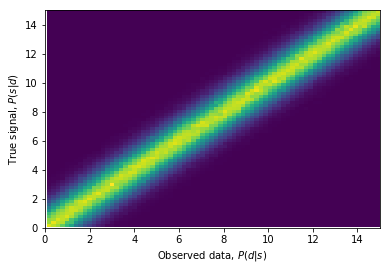

In [3]:
backgrnd = stats.norm.rvs(loc=0, scale=1, size=1000000)
x = np.linspace(-20,20,100)
signal = stats.uniform.rvs(loc=0, scale=15, size=1000000)
new_data = backgrnd + signal

data_edge = np.linspace(0,20,100)
signal_edge = np.linspace(0,20,100)

## Did some research about histogram2d, this will help me plot the data
psd, x, y = np.histogram2d(new_data,signal, bins=[data_edge,signal_edge], density=True)
centered_data = (data_edge[:-1] + data_edge[1:]) / 2
signal_center = (signal_edge[:-1] + signal_edge[1:]) / 2
plt.pcolormesh(centered_data, signal_center, psd.transpose())
plt.ylabel('True signal, $P(s|d)$')
plt.xlabel('Observed data, $P(d|s)$')
plt.xlim([0,15])
plt.ylim([0,15])

In [4]:
new_table = pd.DataFrame(columns = ['Signal', 'Background', 'Data'])
new_table['Data'] = new_data
new_table['Signal'] = signal
new_table['Background'] = backgrnd

I am selecting data that was a true signal of 12, and ranges between +- 0.3. I will also plot data that includes background to see the distribution of the data with background. This will help to see if the background 'changes' the given signal data. 

Text(0.5,1,'True Signal at a value of 12 of Observed Signal Spread')

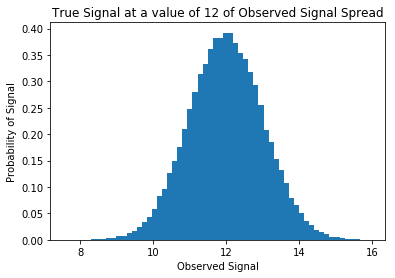

In [5]:
sig_12 = new_table.query(f'11.7 < Signal < 12.3')
plt.hist(sig_12['Data'], bins =60, density = True)
plt.xlabel('Observed Signal')
plt.ylabel('Probability of Signal')
plt.title('True Signal at a value of 12 of Observed Signal Spread')

The plot above shoes the spread of values between a true signal of 12 +-0.3. This is the distribution of th collected data, including background, for the true signal value of 12.

When we are calculating $P(signal|data)=\frac{P(data|signal)P(signal)}{P(data)}$, the P(data) acts as the normalization factor. Since we have a gaussian background distribution, this normalization factor can be rendered obsolete. So $P(signal|data)\propto P(data|signal)$ and will yield the same histogram as they will have the same values no matter which way you look at it.

Text(0.5,1,'Observed Signal at a value of 12 of possibility of true signal spread')

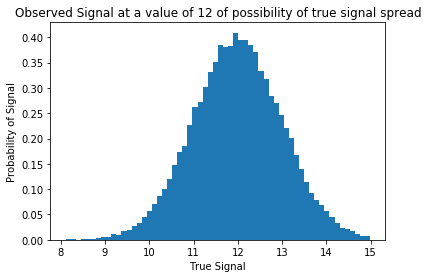

In [6]:
obs_sig_12 = new_table.query(f'11.7 < Data < 12.3')
plt.hist(obs_sig_12['Signal'], bins =60, density = True)
plt.xlabel('True Signal')
plt.ylabel('Probability of Signal')
plt.title('Observed Signal at a value of 12 of possibility of true signal spread')


If the detector was to provide a reading of 12, this would be the same as taking a vertical strip of the 2D axis above 12. Hence, this represented the all the possible true signals when the true signal is detected to be 12. 

Now, I will be changing the parameters of the background distribution so that it is certained at 5, with a sigma value of 4. This will ensure that the true and observed signal values will not be centered at the same point and create a 1:1 ratio slope as seen above in the 2d hist plot. I will plot  $P(signal|data)$ and $ P(data|signal)$ as I did for the above plots

(0, 23)

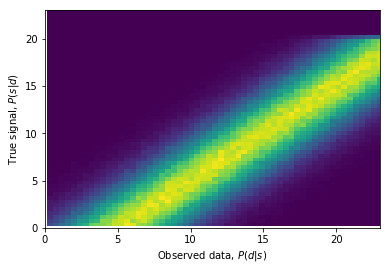

In [12]:
backgrnd = stats.norm.rvs(loc=5, scale=3, size=1000000)
x = np.linspace(-20,20,100)
signal = stats.uniform.rvs(loc=0, scale=20, size=1000000)
new_data = backgrnd + signal

data_edge = np.linspace(0,40,100)
signal_edge = np.linspace(0,40,100)

## Did some research about histogram2d, this will help me plot the data
psd, x, y = np.histogram2d(new_data,signal, bins=[data_edge,signal_edge], density=True)
centered_data = (data_edge[:-1] + data_edge[1:]) / 2
signal_center = (signal_edge[:-1] + signal_edge[1:]) / 2
plt.pcolormesh(centered_data, signal_center, psd.transpose())
plt.ylabel('True signal, $P(s|d)$')
plt.xlabel('Observed data, $P(d|s)$')
plt.xlim([0,23])
plt.ylim([0,23])

In [13]:
new_table = pd.DataFrame(columns = ['Signal', 'Background', 'Data'])
new_table['Data'] = new_data
new_table['Signal'] = signal
new_table['Background'] = backgrnd

Text(0.5,1,'True Signal at a value of 12 of Observed Signal Spread')

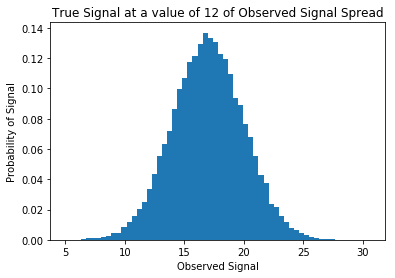

In [16]:
sig_12 = new_table.query(f'11.7 < Signal < 12.3')
plt.hist(sig_12['Data'], bins =60, density = True)
plt.xlabel('Observed Signal')
plt.ylabel('Probability of Signal')
plt.title('True Signal at a value of 12 of Observed Signal Spread')

Here, any true value at a value of 12 will be centered at an observed signal value of ~16 with a sigma value equal to 3. 

Text(0.5,1,'Observed Signal at a value of 12 of possibility of true signal spread')

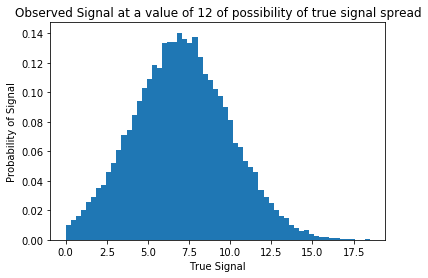

In [15]:
obs_sig_12 = new_table.query(f'11.7 < Data < 12.3')
plt.hist(obs_sig_12['Signal'], bins =60, density = True)
plt.xlabel('True Signal')
plt.ylabel('Probability of Signal')
plt.title('Observed Signal at a value of 12 of possibility of true signal spread')

Now, if the observed value of the signal is 12, we can conclude it was made from a true signal of the possibilities stated avoce. Here we will see it will be centered at a value of 7 with a sigma value of 3.  

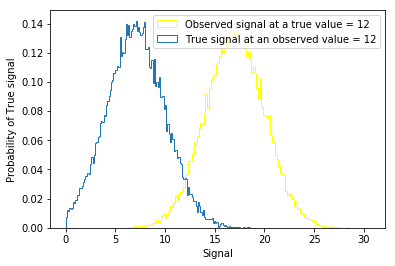

In [17]:
plt.hist(sig_12['Data'], bins =150, density = True, histtype='step', color='yellow', label="Observed signal at a true value = 12")
plt.hist(obs_sig_12['Signal'], bins =150, density = True, histtype='step', label="True signal at an observed value = 12")
plt.xlabel('Signal')
plt.ylabel('Probability of True signal')
plt.legend()

Now, these two plots are different from one another because the background distribution does not have an average of zero. They are also offset from 12 in either direction. Hence, you can add ~5 to the true signal and get the observed signal. Vice versa too, you can subract ~5 to the observed signal to get the spread of the possible true signals. 
